# PREDICTING MOLECULAR PROPERTIES
By Sarita Charde, 2019

# Introduction

This notebook is going to be focused on solving the problem of predicting Molecular Properties for house Chemical Engineering, Materials Science and Healthcare.

The only way to predict molecules is by quantum mechanics using NMR and DFT methods, which takes time and is a costly affair. A knowledge about the structure of molecules using computational technique can save time and money.

An approximate and first hand knowledge of molecules could improve the research and development in healthcare resulting in discovery and invention of molecules.

The dataset is from Kaggle competition and is as huge as 4 million values. The only drawback is that the number of features are too less. We might want to check if the model works well without any new features.
Creating new features is an important part of this model. We have been provided with additional dtasete related to the properties of molecules. 
We are going to take advantage of all of the feature variables available to use and use it to analyze and predict the target.

We are going to break everything into logical steps that allow us to ensure the cleanest, most realistic data for our model to make accurate predictions from.
This notebook contains the the following steps
Load Data and Packages
Analyzing the Test Variable (Sale Price)
Multivariable Analysis
Impute Missing Data and Clean Data

Next notebook contains the following 
Feature Transformation/Engineering
Modeling and Predictions

# Understanding the Client and their Problem

A benefit to this study is that we can have an approximate first hand information about the molecules in less time and 50% less expenses.

Client Healthcare: This client wants to synthesize new drugs or to discover new pathogens. Before geeting to this point, they want to confirm if the research is on the right track. With this study, they can understand if they are getting close to their target. If they can confirm that they are on right track they can go for further confirmation using some experimental techniques. Advantages are that the target can be achieved in less time and money.

Material science and Chemical Engineering: It can contribute towards development of new and smart materials with less expenses and in short time. Research and Development expenses are too high and if it is possible to save time and money, we can save a lot of resources too, which are on the verge of extinction.

# 1. Packages 

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
%matplotlib inline

# 2 Data loading, from Kaggle competition, the link is below
https://www.kaggle.com/c/champs-scalar-coupling

In [2]:
%time train=pd.read_csv(r'C:\Users\praty\Documents\backup work data science\work\capstone\datasets\train\train.csv')

Wall time: 4.61 s


In [3]:
%time test=pd.read_csv(r'C:\Users\praty\Documents\backup work data science\work\capstone\datasets\test\test.csv')

Wall time: 1.69 s


In [28]:
%time structures=pd.read_csv(r'C:\Users\praty\Documents\backup work data science\work\capstone\datasets\train\structures.csv')

Wall time: 4.99 s


In [29]:
sccontributions=pd.read_csv(r'C:\Users\praty\Documents\backup work data science\work\capstone\datasets\train\scalar_coupling_contributions.csv')

In [6]:
dipole_moments=pd.read_csv(r'C:\Users\praty\Documents\backup work data science\work\capstone\datasets\train\dipole_moments.csv')

In [7]:
magnetic_shielding_tensors=pd.read_csv(r'C:\Users\praty\Documents\backup work data science\work\capstone\datasets\train\magnetic_shielding_tensors.csv')

In [8]:
mulliken_charges=pd.read_csv(r'C:\Users\praty\Documents\backup work data science\work\capstone\datasets\train\mulliken_charges.csv')

In [9]:
potential_energy=pd.read_csv(r'C:\Users\praty\Documents\backup work data science\work\capstone\datasets\train\potential_energy.csv')

# 3. Profiling and cleaning datasets
Profiling is examining the data for the type, and range. Here we should decide for the data range whether it is continuous or discrete.

In [10]:
[train.shape], [test.shape], [structures.shape], [sccontributions.shape] 

([(4658147, 6)], [(2505542, 5)], [(2358657, 6)], [(4658147, 8)])

## 3a.Test data is nearly half of the train data.
The train data is 4 millions with few features. 
there are many additional files available but test data set does not have a corrresponding additional data for them is not availabe.

In [13]:
[dipole_moments.shape], [magnetic_shielding_tensors.shape], [mulliken_charges.shape], [potential_energy.shape]

([(85003, 4)], [(1533537, 11)], [(1533537, 3)], [(85003, 2)])

## 3b. let us examine the data type and the ranges

In [15]:
train.head(5)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [16]:
train.tail(5)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
4658142,4658142,dsgdb9nsd_133884,17,4,2JHC,3.543450
4658143,4658143,dsgdb9nsd_133884,17,5,3JHC,0.568997
4658144,4658144,dsgdb9nsd_133884,17,6,3JHC,1.173370
4658145,4658145,dsgdb9nsd_133884,17,7,2JHC,4.762010
4658146,4658146,dsgdb9nsd_133884,17,8,1JHC,117.934000


The training has an id for each row, the name of the molecule where the coupling constant originates (the corresponding XYZ file is located at ./structures/.xyz).atom_index_0 and atom_index_1 is the atom indices of the atom-pair creating the coupling. type is the type of the coupling and scalar_coupling_constant is the scalar coupling constant that we want to be able to predict.

In [17]:
test.tail()

,id,molecule_name,atom_index_0,atom_index_1,type
2505537,7163684,dsgdb9nsd_133885,15,3,2JHC
2505538,7163685,dsgdb9nsd_133885,15,4,2JHC
2505539,7163686,dsgdb9nsd_133885,15,6,3JHC
2505540,7163687,dsgdb9nsd_133885,15,7,2JHC
2505541,7163688,dsgdb9nsd_133885,15,8,1JHC


The test set structure is the same as the training except that we don't have the scalar_coupling_constant column. Among the other datasets, the most promising seems to be structures.csv, as it is the only one that is available for both training and testing sets. All the other dataframes are available only for the former.

In [18]:
train.info(),sccontributions.info(),dipole_moments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658147 entries, 0 to 4658146
Data columns (total 6 columns):
id                          int64
molecule_name               object
atom_index_0                int64
atom_index_1                int64
type                        object
scalar_coupling_constant    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 213.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658147 entries, 0 to 4658146
Data columns (total 8 columns):
molecule_name    object
atom_index_0     int64
atom_index_1     int64
type             object
fc               float64
sd               float64
pso              float64
dso              float64
dtypes: float64(4), int64(2), object(2)
memory usage: 284.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85003 entries, 0 to 85002
Data columns (total 4 columns):
molecule_name    85003 non-null object
X                85003 non-null float64
Y                85003 non-null float64
Z                85

(None, None, None)

## 3c Checking for null values

In [19]:
train.isnull().sum()

id                          0
molecule_name               0
atom_index_0                0
atom_index_1                0
type                        0
scalar_coupling_constant    0
dtype: int64

In [20]:
test.isnull().sum()

id               0
molecule_name    0
atom_index_0     0
atom_index_1     0
type             0
dtype: int64

In [21]:
structures.isnull().sum()

molecule_name    0
atom_index       0
atom             0
x                0
y                0
z                0
dtype: int64

In [22]:
sccontributions.isnull().sum()

molecule_name    0
atom_index_0     0
atom_index_1     0
type             0
fc               0
sd               0
pso              0
dso              0
dtype: int64

In [23]:
dipole_moments.isnull().sum()

molecule_name    0
X                0
Y                0
Z                0
dtype: int64

In [24]:
magnetic_shielding_tensors.isnull().sum()

molecule_name    0
atom_index       0
XX               0
YX               0
ZX               0
XY               0
YY               0
ZY               0
XZ               0
YZ               0
ZZ               0
dtype: int64

In [25]:
train.nunique()

id                          4658147
molecule_name                 85003
atom_index_0                     29
atom_index_1                     29
type                              8
scalar_coupling_constant    2182935
dtype: int64

In [26]:
test.nunique()

id               2505542
molecule_name      45772
atom_index_0          28
atom_index_1          29
type                   8
dtype: int64

So in our main train and test data files we have information about moleculas and pairs of atoms

1. test set is ~2 times smaller that train set
2. we have 8 unique coupling types for test and train
3. all are type int64 

In [27]:
train.head(2)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570


In [28]:
df=train.drop(['id'], axis=1)


In [29]:
df.head(2)

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,dsgdb9nsd_000001,1,2,2JHH,-11.2570


# 3d Study pattern of the features

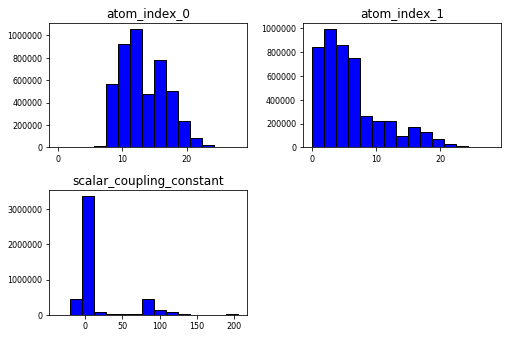

In [30]:

df.hist(bins=15, color='blue', edata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAf8AAAFSCAYAAAD8c9aOAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAHv5JREFUeJzt3X20XXdd5/H3hyYNUggJJCUWaTMURCi2XfWGtk4zbWmXdM34gH+gI8iD4oq4lk5HoMJiUMGnsT5lqvgwnRHBKai4lgsV1ErUQGJb2tsuYCxjR+siw1MuKSUJpaSS5jt/nH3h5PYmOffmPN37e7/WOitn//Y+53x/+9ydz/ntvc8+qSokSVI7HjfpAiRJ0ngZ/pIkNcbwlySpMYa/JEmNMfwlSWqM4S9JUmMMf0mSGmP467Qk+Z0kP7nMx74qyd5h1yRptNzuVz7Df5WY1AZVVa+pqp8d9+sOKsmPJ9mf5FCStydZN+mapGFxu3+sJM9PcmuSB5J4FbsTMPy1aiV5EfBG4BpgK/BM4K2TrEnSyH0FeA/w6kkXMs0M/xUmyRuT3J/ki0k+nuS7kzwX+B3g8iQPJTnYLfvkJL+f5ECSfUnenORx3bxXJfn7JDuTHEzyL0m+tWv/ZJLPJXnlAPW8I8nPdfevSvKpJK/rHv/ZJD/Qt+xTk/xZksNJ7gTOX/Bc35TkA0keTHJfku/p2s9M8pEkP9ZNn9HV/lOnKO+VwO9W1b1V9QXgZ4FXDbampenhdj/4dl9V91XV7wL3LmUdt8bwX3nuB7YDT6Y3ir0FOAi8Bri9qp5YVRu6ZX+jW+6ZwJXAK4Af6HuuS4GPAU8F3g38IbANeBbw/cDbkjxxifVt6V7z6fQ+ef9mko3dvN8EjgBfD/xgdwMgyVnAB7o6zga+D/itJBdU1b929fxM9x/eG4EzgJ8/RS0XAB/tm/4o8LQkT11in6RJc7sffLvXIKrK2wq+AR8BvoveiHZvX/sZwCPA8/rafhjY3d1/FfBPffO+GSjgaX1tnwcuPsXrvwP4ue7+VcCXgTV98z8HXNbV8xXgm/rm/cJ8zcD3AnsWPPd/B366b/p1wD8CXwCePcC6uR+4rm96bdfHrZN+37x5O52b2/1A6+hZvYib/Ps1jTdH/itMkld0u8IOdrv5ng9sWmTRTcCZwL6+tn30PpnPm+u7/2WAqlrYttQRwOer6mjf9MPdc2wG1gCfXFDPvPOAS+f71fXtZfRGFPPeSe/Y/V9U1T8NUMtDwPq+6fn7XxykI9K0cLtf0navARj+K0iS84D/Afwo8NTq7eb7ByD0Pr33e4DeJ+7z+trOBT49hlIXcwA4Cjyjr+3cvvufBD5YVRv6bk+sqh/pW+a3gPcBL0pyxQCveS9wUd/0RcBcVX1+eV2Qxs/tfsnbvQZg+K8sZ9Hb2A8AdCfVPL+bNwd8Q5IzAarqUXpnvP58kid1/4G8lt6xwrHr6vkT4C1JnpDkefROyJv3PuAbk7w8ydrutq071keSlwPfQm+35X8C3jnAccnfB16d5Hnd8cc309tdKa0kbvdL2O7T83h6e0BI8vj4Fd/HMPxXkKr6OPCrwO30NvpvBv6+m/239Ea6+5M80LX9GPAl4F+AvfROqnn7OGte4Efp7QrcTy+Ef29+RlV9Efg24D8Cn+mWuRFYl+Rc4L8Br6iqh6rq3cAssPNkL1ZVfwX8EvB39HY17gN+erhdkkbL7X5p2z29vR5f5mtn+38ZuG9YnVkt0p0YIUmSGuHIX5Kkxhj+OqUk93YXEVl4e9kU1PaXJ6jtTZOuTVrJ3O5XN3f7S5LUGEf+kiQ1Zs2kCxiGTZs21datWyddhjRV7r777geqavOk6xgVt3vpsQbd7ldF+G/dupXZ2dlJlyFNlST7Tr3UyuV2Lz3WoNu9u/0lPUaSc5Lck+RIkjVd284ke5Lc1LfcyNskDZ/hL2kxDwLXAHcAJLkEOKuqtgNndldhG3nb+LsttWFV7PaXNFxVdQQ4kmS+6XJgV3d/F71fbDs2hra7htgtSR1H/pIGsQE43N0/BGwcU9txkuxIMptk9sCBA0PpmNQiw18AbNmylSQD37Zs2TrpkjVeB/naTyKv76bH0Xacqrq5qmaqambz5uF/kcHtQK0w/AXA3Nw+ej8cNtitt7wacju9cwAArqV3LsA42sbK7UCtMPwlPUb306q7gIuAW4G19M4B2AMcq6o7q+qeUbdNoOtSE055wl+Sc+j95vLzgCdW1dEkO4EZ4J6qur5bbuRtksajqr5Cb/Td78OLLPeYbXPYbZKGb5CRv1/5kSRpFTnlyN+v/EiStLos55i/X/mRJGkFW074N/GVH0mSVqvlhH8TX/mRJGm1OmX4+5UfSZJWl0FO+PMrP5IkrSJe5EeSpMYY/pIkNcbwlySpMYa/JEmNMfxXqaX+NKkkqR2G/yq11J8mlbQc65b0IXvLlq2TLlgCBviqnyTpRB5hKR+e5+bcy6bp4Mhf0qrl4S9pcY78Ja1aXzv8NSg/AKgNjvwlDSTJE5K8P8nuJH+aZF2SnUn2JLmpb7mhtkkaPsNf0qCuAz5cVVcBdwJvBM6qqu3AmUm2JblkmG2T6KTUAnf7SxrU/cC3dPc3AA8Bu7rpXcBlwLEht901gn5IzXPkL2lQ/wRcmuReYAY4Chzu5h0CNtL7UDDMtuMk2ZFkNsnsgQMHhtczqTGGv6RBvRK4taouAN5Pb8/h+m7eeuBgdxtm23Gq6uaqmqmqmc2bNw+vZ1JjDH9JgwrwYHf/ge7fa7p/rwXuAG4fcpukEVhW+HvWr9SkdwPfk2Q38DLgN4AjSfYAx6rqzqq6Z5htk+ik1ILlnvA3f9bvzyT5L/Sd9Zvkt7uzdB8dZltVeeKPNEFVdRB40YLm6xdZbqhtkoZvueHvWb+SJK1Qyz3m71m/krRk/hCQpsNyw9+zfiVpyeZ/CGiwW+/yxNLwLTf8PetXS7LUH1hxxCNJo7Pc8PesXy3J135gxRGPJE3ask7486xfSZJWLi/yI0lSYwx/SZIaY/hLktQYw1+SpMYY/pIkNcbwlySpMYa/JEmNMfwlSWqM4S9JUmMMf0mSGmP4SxpYklck+Zsku5M8PcnOJHuS3NS3zFDbJA2f4S9pIEmeDlxZVddU1VXA04Czqmo7cGaSbUkuGWbbRDoqNWBZP+wjqUkvAs5I8jfAx4F/BHZ183YBlwHHhtx214j6IjXNkb+kQT0NOLOqrgEeBjYAh7t5h4CNI2g7TpIdSWaTzB44cGB4PZMas+zw99if1JxDwAe7+3/b/bu+79+D3W2YbcepqpuraqaqZjZv3jyELkltWlb4e+xPatJtwIXd/YuBAq7ppq8F7gBuH3KbpBFY7jF/j/1JjamqjyT5cpLdwAPAS4FfTrIH+GhV3QmQ5Mgw2yQN33LD/6vH/pLcSO9Y3f3dvEPABcCjQ247TpIdwA6Ac889d5ndkLQUVfX6BU3XL7LMUNskDd9yj/l77E+SpBVqueHvsT9JklaoZYV/VX0EmD/2tw34FWD+WN2xqrqzqu4ZZtvpd1WSJMFpXOTHY3/jtWXLVubm9k26DEnSKuAV/laIXvDXEh6RUZUiSVrhvMKfJEmNMfwlSWqM4S9JUmMMf0mSGmP4S5LUGMNfU2odSQa+bdmyddIFS9KK4Vf9NKUeYSlfbZyb86uNkjQoR/6SJDXGkb+WqbdbXpK08hj+Wqal7Zb3ioOSND3c7S9JUmMMf0kDS/LaJHu7+zuT7ElyU9/8obZJGg3DX9JAkqwDLuruXwKcVVXbgTOTbBt220Q6KTXitMLfUYDUlB8C3tndvxzY1d3fBVw2gjZJI7Ls8HcUILUjyVrgyqr6265pA3C4u38I2DiCtsXq2JFkNsnsgQMHhtAzqU2nc7b//CjgZ1j8U/uxIbfddRq1Sjo9Lwfe3Td9EFjf3V/fTT865LbHqKqbgZsBZmZmlvJ1E0l9ljXyn5ZRgKSxeQ7wI0n+CrgA2ARc0827FrgDuH3IbZJGZLkj/4mPApLsAHYAnHvuucvshqRBVNUb5u8n2VtVb01yU5I9wEer6s5u3pFhtkkajeWG/3OAi5O8hq+NAi4E3kPvU/s7gKPADw+x7Tju/pMmo6qu6P69fpF5Q22TNBrL2u1fVW+oqhdV1XXAvVX1VmD+U/uxqrqzqu4ZZttQeitJkk7/8r6OAiRJWlm8yI8kSY0x/CVJaozhL0lSYwx/SZIaY/hLktQYw1+SpMYY/pIkNcbwlySpMYa/JEmNMfwlaWqtI8nAty1btk66YK0Qp315X0nSqDwCDP67ZXNzGV0pWlUc+UuS1BjDX5Kkxhj+kgaS5NIktyXZk2Rn13ZDkr1J3pVk7SjaJA2f4a9VwhOjxmAf8MKq2g6cnWQ7cHX3s94fA16cZPMw28bewxVvadvBGWec5XbTqGWFvyMATZ/5E6MGu83N7ZtQnStXVe2vqiPd5FHgQmB3N70LuAx4wZDbtCRL2w6OHXt4Scu73aweyx35OwKQGpXkQmATcBA43DUfAjYCG4bcJmkElhX+jgCkNiV5CvA24NX0wn99N2t9Nz3stoWvvyPJbJLZAwcODK9jUmNO65j/JEcA/icgjVeSNcAtwA1VtR+4C7iym30tcMcI2o5TVTdX1UxVzWzevHl4nZMas+zwn/QIwP8EpLF7CbANuDHJbuB84ENJ9gIXA++tqs8Ns23M/ZOasdwT/iY+ApA0XlX1B1W1uaqu6m63V9WNVXVFVb20qv61W26obVq5tmzZ6rcJptRyR/6OACRJJ9X7doDfJphGqRr8utHTamZmpmZnZyddxkglYSnX+AaXP9Xyq+Fv/2SS3F1VM5OuY1QG2e7dboa//FK2m+Ws/9W+XY7aoNu9F/mRJKkxhr8kSY0x/CVJU8LLdI/LmkkXIElSz/zliQczN5fRlbLKOfKXJKkxhr8kSY1xt78kaUDruq/vaaUz/CVJA1raMfnedQQ0jdztr0Z5VrGkdhn+atT8CMbLjkorlx/il8vd/pKkFcqvBi6XI39Jkhpj+EuS1BjDX5Kkxkx1+CfZmWRPkpsmXYuk8XC71+h4guC8qQ3/JJcAZ1XVduDMJNsmXZNa5n8a4+B2r9HyWz7zpjb8gcuBXd39XcBlE6xl6LZs2bqkMNGk+Z/GmKzq7V4rzer90D/NX/XbANzf3T8EXNA/M8kOYEc3+VCS+07xfJuAB4Za4dgt9UPAccsP0P/Tev6VsPyCdTDaeqbgQ9t5ky5gGUaw3WeJ2/3E/06HuXzr2/0i/R/ddjk3t2/FbPfTHP4HgfXd/fXd9FdV1c3AzYM+WZLZqpoZXnkrS+v9B9fBCuF2P0T2v+3+n8w07/a/Hbimu38tcMcEa5E0Hm730hhMbfhX1T3AkSR7gGNVdeeka5I0Wm730nhM825/qur6IT7dwLsKV6nW+w+ugxXB7X6o7L8Wlaql/DyjJEla6aZ2t78kSRoNw1+SpMY0Ef4tXi40yTlJ7klyJMmarq2Z9ZDk0iS3df3d2bXdkGRvknclWTvpGjVaLf29z3O7d7sf1KoP/4YvF/ogva9M3QFNrod9wAu7/p6dZDtwdVVdAXwMePFEq9NINfj3Ps/t3u1+IKs+/Gn0cqFVdaSqvtDX1NR6qKr9VXWkmzwKXAjs7qZXff/V1t/7PLd7t/tBtRD+G4DD3f1DwMYJ1jJJTa6HJBfSu8TnQRrsf8Oa/HtfRJPrwe3+1FoI/5NeLrQhza2HJE8B3ga8mgb73zjf757m1oPb/WBaCH8vF9rT1HroTna6BbihqvYDdwFXdrNXff/V1t/7STS1HtzuB7fqw7/Vy4UmWZtkF3ARcCuwlrbWw0uAbcCNSXYD5wMfSrIXuBh47wRr04i53bvdu92fnFf4kySpMat+5C9Jko5n+EuS1BjDX5Kkxhj+kiQ1xvCXJKkxhr8kSY0x/CVJaozhL0lSYwx/SZIaY/hLktQYw1+SpMYY/pIkNcbwn4Akb0lyy6TrGIYk70jyc9397Unum3RNkqSTM/w1NFW1p6qeM+k6hinJJ5JcO8TnqyTPGtbzSdJyGP4rTJIzJl2DJGllM/wHlOQNST6d5ItJ7ktyTZIzkrwpyf1d+91JntEtf1OSTyY53LVvP8lz/3GS/UkOJflQkgv65r0jyW8n+YskXwKuPsnzfF2SX02yr3uuvUm+rpv3nUnuTXIwye4kz+173HGj0QW78q9K8qmunw90I+GXneD1r0ryqb7pTyR5fZKPdfX8UZLH983/iSSfTfKZJD80yKj4NPp4wlqSbEryvu5xDybZk+RxSf4XcC7w50keSvITA75fv5nk/d3fxIeTnN/N+1C32Ee75/vek/VVkkbF8B9AkucAPwpsq6onAS8CPgG8Fvg+4N8D64EfBB7uHnYXcDHwFODdwB/3B98Cfwk8GzgbuAd414L5LwV+HngSsPckpf4K8C3At3av+xPAsSTfCPwB8J+BzcBf0Au0M0/dewC2AJuApwOvBG7u1skgvge4Dvg3wIXAqwCSXEdv/V0LPAu4csDnO50+LloL8DrgU93jnga8Caiqejnw/4DvqKonVtUvdcuf6v36PuCtwEbgn+m9d1TVv+vmX9Q93x8N2GdJGirDfzCPAuuA5yVZW1WfqKr7gR8C3lxV91XPR6vq8wBVdUtVfb6qjlbVr3aPXzQwq+rtVfXFqnoEeAtwUZIn9y3yp1X191V1rKqOLPYcSR5H78PH9VX16ap6tKpu657ze4H3V9UHquor9AL06+gF6KB+sqoeqaoPAu+nF6SD+PWq+kxVPQj8Ob0PRHSP/72qureqHqYXlic1hD6eqJavAF8PnFdVX+nOXagT1THA+/UnVXVnVR2l98Hg4sWeR5ImxfAfQFX9M70R5VuAzyX5wyTnAM8A7l/sMUlel+T/dLuGDwJPpjd6XrjcGUl+sTt0cJjeHgUWLPvJAcrcBDz+BPWcA+zr68+x7jmfPsDzAnyhqr7UN72ve85B7O+7/zDwxL6a+vs1jj6eqJZfpjdC/+sk/5LkjScqYMD360SvI0lTwfAfUFW9u6quAM4DCriRXricv3DZ7vj+G+iNbjdW1QbgEJBFnvqlwHfR2/39ZGDr/NP0v/wAJT4AHFmsHuAzXd3z9YXeB5dPd00PA0/oW37LgsdvTHJW3/S53XOejs8C39A3/YwBHnM6fTyhbhT/uqp6JvAdwGuTXDM/e8Hig7xfkjTVDP8BJHlOkhcmWUcvfL5M71DA/wR+Nsmz03NhkqfSOzZ/FDgArEnyU/TOCVjMk4BHgM/TC+BfWE6N3Uj37cCvJTmnG6Fe3tX8HuA/pHeS4lp6x7gfAW7rHv4R4KXdY65j8ePvb01yZvfB5tuBP15OnX3eA/xAkucmeQLwUyPu4wkl+fYkz+o+MBym994+2s2eA57Zt/jpvl8Ln0+Sxs7wH8w64BfpjTz30zvR603Ar9ELnb+mFxq/S+848630Tgr7v/R2RR/hxLu1f79b5tPAx4E7TqPO1wP/m97Jhg/S2zvxuKq6D/h+4De6PnwHvZPY/rV73PVd20HgZcB7FzzvfuAL9EbX7wJeU1X/eBp1UlV/Cfw68Hf0drnf3s165BQPXW4fT+bZwC7goa6O36qq3d28/wq8ufsmwOs5/ffrLcA7u+cb9LwJSRqqnOS8JokkVwG3VNU3nGrZ03yd5wL/AKzrTpSTJI2II39NTJLv7g4lbKQ3gv9zg1+SRs/wX2G6i9g8tMht0QvvTLkfpndexP30jrH/CKy6PkrS1HG3vyRJjXHkL0lSY9ZMuoBh2LRpU23dunXSZUhT5e67736gqjZPug5J02dVhP/WrVuZnZ2ddBnSVEmy79RLSWqRu/0lSWqM4S9JUmMMf0mSGmP4S5LUGMN/SLZs2UqSgW9btmyddMmSpEatirP9p8Hc3D4G++Xd+eX9BVhJ0mQ48pckqTGGvyRJjTH8JUlqjOEvSVJjDH9Jkhpj+EuS1BjDX5Kkxhj+kiQ15pThn+T5SW5LsifJ76VnZzd9U99yI2+TJEmnb5CR/31V9a1Vtb2bfgFwVjd9ZpJtSS4ZdduwOy5JUqtOeXnfqvpK3+QjwLXArm56F3AZcGwMbXcN3i1JknQiAx3zT/KdSf4BOJveB4bD3axDwEZgwxjaFta0I8lsktkDBw4M0g1JksSA4V9Vf1ZVzwc+DRwF1nez1gMHu9uo2xbWdHNVzVTVzObNmwfphiRJYrAT/tb1TR6m99N113TT1wJ3ALePoU2SJA3BICP/65J8MMkHgacBvwgcSbIHOFZVd1bVPaNuG0HfJUlqUqoG/w36aTUzM1Ozs7MTrSEJvZ0iAz+C1bDuNb2S3F1VM5OuQ9L08SI/kiQ1xvCXJKkxhr8kSY0x/CVJaozhL0lSYwx/SZIaY/hLktQYw1+SpMYY/pIkNcbwlySpMYa/JEmNMfwlSWqM4S9JUmMMf0mSGmP4S5LUGMNfkqTGGP6SJDXG8JckqTGGvyRJjTH8JUlqjOEvSVJjDH9Jkhpj+EuS1BjDX5Kkxhj+kiQ1xvCXJKkxhr8kSY05ZfgnuTTJbUn2JNnZtd2QZG+SdyVZO642SZJ0+gYZ+e8DXlhV24Gzk2wHrq6qK4CPAS9OsnnUbUPttSRJDTtl+FfV/qo60k0eBS4EdnfTu4DLgBeMoU2SJA3BwMf8k1wIbAIOAoe75kPARmDDGNoW1rMjyWyS2QMHDgzaDUmSmjdQ+Cd5CvA24NX0wn99N2t9Nz2OtuNU1c1VNVNVM5s3bx6kG5IkicFO+FsD3ALcUFX7gbuAK7vZ1wJ3jKlNkiQNwSAj/5cA24Abk+wGzgc+lGQvcDHw3qr63KjbhthnSZKalqqadA2nbWZmpmZnZydaQxJgKesyrIZ1r+mV5O6qmpl0HZKmjxf5kSSpMYa/JEmNMfwlSWqM4S9JUmMMf0mSGmP4S5LUGMNfkqTGGP6SJDXG8JckqTGGvyRJjTH8JUlqjOEvSVJjDH9Jkhpj+EuS1BjDX5Kkxhj+kiQ1xvCXJKkxhr8kSY0x/CVJaozhL0lSYwx/SZIaY/hLktQYw1+SpMYY/pIkNcbwlySpMYa/JEmNMfwlSWrMKcM/yTlJ7klyJMmarm1nkj1JbupbbuRtkiTp9A0y8n8QuAa4AyDJJcBZVbUdODPJtnG0Db3nkiQ1as2pFqiqI8CRJPNNlwO7uvu7gMuAY2Nou2tJPZMkSYtazjH/DcDh7v4hYOOY2iRJ0hCccuS/iIPA+u7++m760TG0HSfJDmAHwLnnnruMbkiS1KbljPxvp3cOAMC19M4FGEfbcarq5qqaqaqZzZs3L6MbkiS1aZCz/dcm2QVcBNwKrKV3DsAe4FhV3VlV94y6bSS9lySpQamqSddw2mZmZmp2dnaiNfROiFzKugyrYd1reiW5u6pmJl2HpOnjRX4kSWqM4S9JUmMMf0mSGmP4S5LUGMNfkqTGGP6SJDXG8JckqTGGvyRJjTH8JUlqjOEvSVJjDH9Jkhpj+EuS1BjDX5Kkxhj+kiQ1xvCXJKkxhv8JbNmylSQD31qz1PWzZcvWSZcsSeqsmXQB02pubh9QS3hEWx8Alrp+5ubaWj+SNM0c+UuS1BjDX5Kkxhj+kiQ1xvCXJKkxhr8kSY0x/CVJaozhL0lSYwx/SZIaY/hLktQYw19jss7LAUvSlPDyvhqTR/BywJI0HaZ65J9kZ5I9SW6adC3D50j45Fw/kjQqUxv+SS4Bzqqq7cCZSbZNuqbhmh8JD3br/ZBOS1w/kjQqUxv+wOXAru7+LuCyCdYyBZY2Ej7jjLNGuvz0Wdl7CvyJZEnjNM3H/DcA93f3DwEX9M9MsgPY0U0+lOS+4Zew1JD76vKbgAeG//yDO3bs4YVNJ61pkeUHsOz10+8kdY1u/czN7TvZh5gB37+xOq6mU9Q/77yRViRpxZrm8D8IrO/ur++mv6qqbgZuHndRg0gyW1Uzk66j3zTWBNNZlzVJWu2mebf/7cA13f1rgTsmWIskSavG1IZ/Vd0DHEmyBzhWVXdOuiZJklaDad7tT1VdP+kalmkaD0dMY00wnXVZk6RVLVWDX3hFkiStfFO721+SJI2G4T9k03JVwiRbk8wl2Z3kr7u2G5LsTfKuJGvHWMs5Se5JciTJmq7tMetpnOtuYU2Lra9uubGtsySXJrmtWwc7T/T6k3ofJa0ehv8QTeFVCT9QVVdV1bcl2QxcXVVXAB8DXjzGOh6k982NO2Dx9TSBdXdcTZ2vrq+uznGvs33AC7t1cHaS7Qtff8Lvo6RVwvAfrmm7KuHV3Sjyx4EXALu79rHWVlVHquoLfU2LraexrrtFaoLj1xeMeZ1V1f6qOtJNHgUuXOT1J/Y+Slo9DP/h2gAc7u4fAjZOsJbPAt8IXE3vOgkzTE9ti62nSa+749ZXkgsnVVP32pvoXdhq2taTpFXA8B+uk16VcJyq6pGq+lJVHQXeB/zztNTG4utpoutukfX1/EnUlOQpwNuAV5/g9afmb0zSymX4D9fUXJUwyZP6Jv8tvfC/spue9BUTF1tPE113i6yv+4G7GOM6606GvAW4oar2n+D1x1qTpNXJ8B+iKbsq4fYkdye5DfhMVX0Y+FCSvcDFwHvHVUiStUl2ARcBtwJrWbCexr3uFqnptQvXV1V9jvGus5cA24Abk+wGzl/4+hOoSdIq5EV+JElqjCN/SZIaY/hLktQYw1+SpMYY/pIkNcbwlySpMYa/JEmNMfwlSWqM4S9JUmP+P8ApTRIdr0KmAAAAAElFTkSuQmCCdgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

atom_index_1 and scalar coupling constant show skewness therefore it needs a treatment, which is done later.

# 3e Checking for the skewness of the target (scalar coupling constant)


 mu = 15.92 and sigma = 34.94



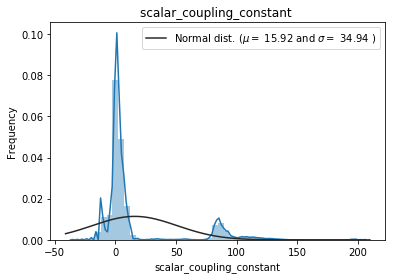

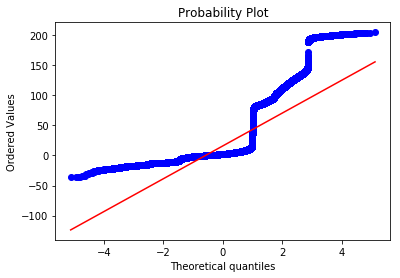

Skewness: 2.024252
Kurtosis: 3.028378


In [31]:
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
# Plot Histogram
sns.distplot(train['scalar_coupling_constant'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['scalar_coupling_constant'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('scalar_coupling_constant ')

fig = plt.figure()
res = stats.probplot(train['scalar_coupling_constant'], plot=plt)
plt.show()

print("Skewness: %f" % train['scalar_coupling_constant'].skew())
print("Kurtosis: %f" % train['scalar_coupling_constant'].kurt())

## 3f. Ckecking for the corrrealtion between the independent varaibles and its relation with target using heatmap 

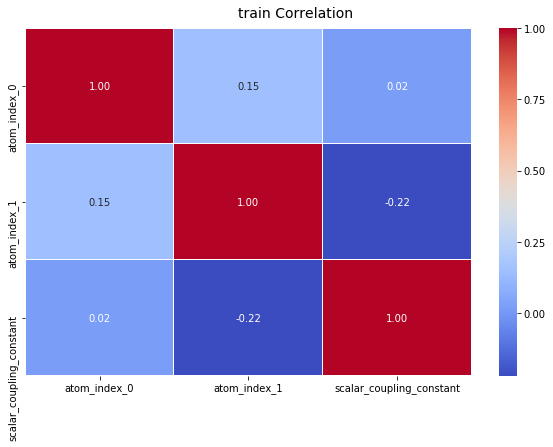

In [34]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('train Correlation', fontsize=14)

Heatmap clearly indicates that the independent features (numerical) are really independent and atom_index_1 is indirectly related to the target

## 3g. pairplot for a sample of train data set

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.005, random_state=42)
for train_index, test_index in split.split(train, train["type"]):
    strat_train_set = train.loc[train_index]
    strat_test_set = train.loc[test_index]
strat_test_set.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
1810504,1810504,dsgdb9nsd_058547,10,0,1JHC,79.14040
1975119,1975119,dsgdb9nsd_062619,13,0,3JHC,7.65296
1629037,1629037,dsgdb9nsd_052848,21,8,1JHC,80.47990
1869836,1869836,dsgdb9nsd_059787,12,4,3JHC,1.27995
2279193,2279193,dsgdb9nsd_070403,16,7,2JHC,16.81580


In [5]:
strat_test_set.shape

(23291, 6)

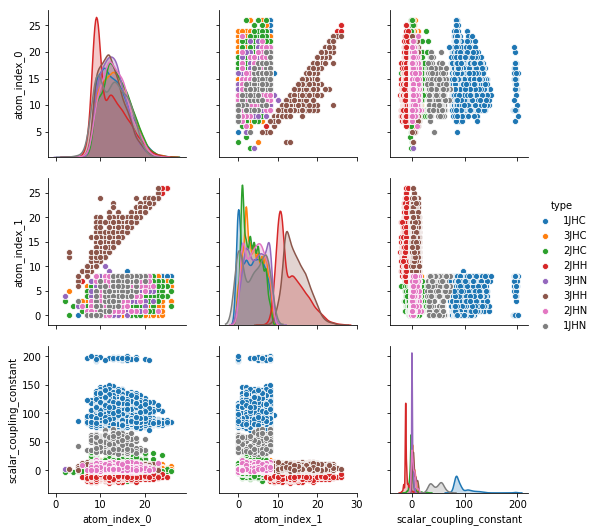

In [6]:
sns.pairplot(data=strat_test_set, hue='type', vars=['atom_index_0','atom_index_1','scalar_coupling_constant'])
plt.show()

It is clearly seen that the data is grouped according to the coupling type

## 3h. Checking the behavioural pattern of train and test data based on coupling type

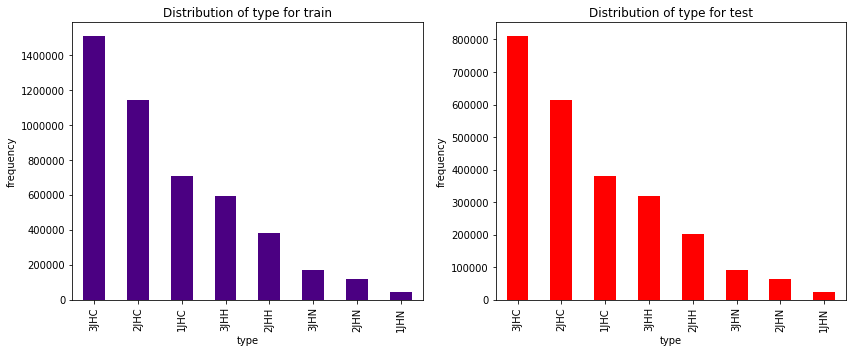

In [88]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of type for train')
plt.ylabel('frequency')
plt.xlabel('type')
train['type'].value_counts().plot.bar(color = 'indigo')

plt.subplot(1, 2, 2)
plt.title('Distribution of type for test')
plt.ylabel('frequency')
plt.xlabel('type')
test['type'].value_counts().plot.bar(color = 'red')
plt.tight_layout()
plt.show()

In [41]:
type_list = train['type'].unique().tolist()
print('Total {} different coupling types are present in train.csv'.format(len(type_list)))
print(*type_list, sep = ", ")
test_type_list = test['type'].unique().tolist()
print('Total {} different coupling types are present in test.csv'.format(len(test_type_list)))
print(*test_type_list, sep = ", ")

Total 8 different coupling types are present in train.csv
1JHC, 2JHH, 1JHN, 2JHN, 2JHC, 3JHH, 3JHC, 3JHN
Total 8 different coupling types are present in test.csv
2JHC, 1JHC, 3JHH, 3JHC, 2JHH, 1JHN, 3JHN, 2JHN


## 3i. Checking the data size of the different coupling types. From above it is clear that there are 8 coupling types

In [12]:
print('train:')
display(train.type.str[0].value_counts(), train.type.str[-2:].value_counts()) # number of coupling interactions for intervening bonds and atom pairs.
print('test:')
display(test.type.str[0].value_counts(), test.type.str[-2:].value_counts())

train:


3    2267405
2    1637963
1     752779
Name: type, dtype: int64

HC    3360469
HH     968647
HN     329031
Name: type, dtype: int64

test:


3    1220050
2     880688
1     404804
Name: type, dtype: int64

HC    1805746
HH     520561
HN     179235
Name: type, dtype: int64

This is giving an idea about the count for number of bonds. 
The datasets have a suprisingly similar distribution of coupling types. This is good, since it means we won't have to worry about oversampling certain types of coupling when we train our model on the training dataset.
But, intuitively it seems that coupling constants with 3 intervening bonds would be the most challenging to predict (due to long-range interactions) and seem to be the most abundant.

H-C interactions also make up a disproportionately large number of coupling compared to the others. ( H-C >> H-H > H-N)

Let's see what the distribution of the number of atoms per molecule looks like:

## 3j. Checking the distribution of atom_index for test and train

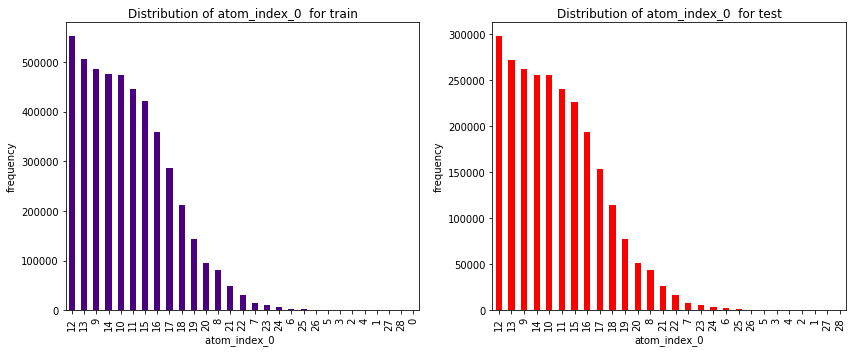

In [89]:
#for distribution of atoms
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of atom_index_0  for train')
plt.ylabel('frequency')
plt.xlabel('atom_index_0  ')
train['atom_index_0'].value_counts().plot.bar(color = 'indigo')

plt.subplot(1, 2, 2)
plt.title('Distribution of atom_index_0  for test')
plt.ylabel('frequency')
plt.xlabel('atom_index_0')
test['atom_index_0'].value_counts().plot.bar(color = 'red')
plt.tight_layout()
plt.show()

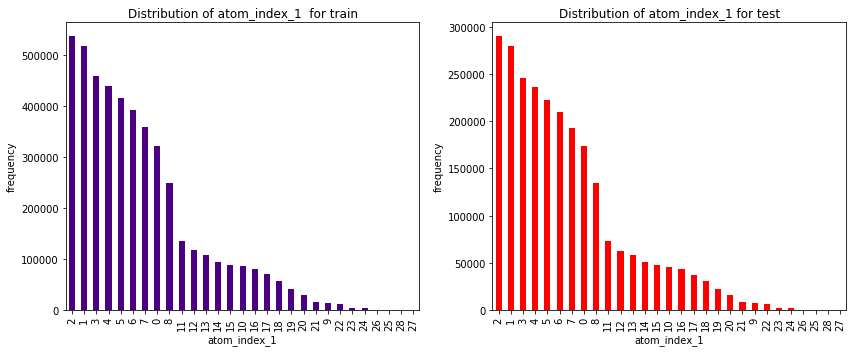

In [12]:
#for distribution of atoms, 
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of atom_index_1  for train')
plt.ylabel('frequency')
plt.xlabel('atom_index_1')
train['atom_index_1'].value_counts().plot.bar(color='indigo')

plt.subplot(1, 2, 2)
plt.title('Distribution of atom_index_1 for test')
plt.ylabel('frequency')
plt.xlabel('atom_index_1')
test['atom_index_1'].value_counts().plot.bar(color='red')
plt.tight_layout()
plt.show()

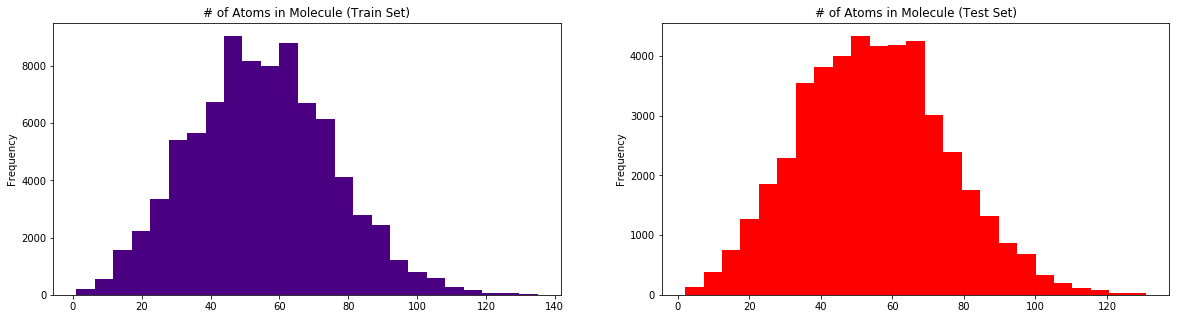

In [13]:
# Number of of atoms in molecule
fig, ax = plt.subplots(1, 2)
train.groupby('molecule_name').count().sort_values('id')['id'].plot(kind='hist',
                                                                       bins=25, 
                                                                        color='indigo',
                                                                        figsize=(20, 5),
                                                                      title='# of Atoms in Molecule (Train Set)',
                                                                      ax=ax[0])
test.groupby('molecule_name').count().sort_values('id')['id'].plot(kind='hist',
                                                                       bins=25, 
                                                                       color='red',
                                                                        figsize=(20, 5),
                                                                      title='# of Atoms in Molecule (Test Set)',
                                                                     ax=ax[1])
plt.show()


In [43]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


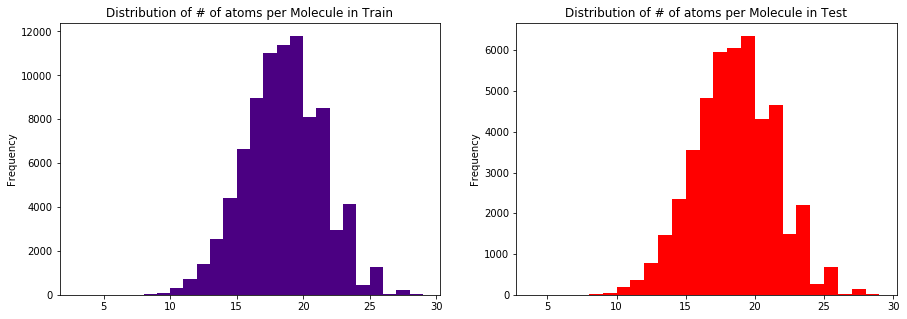

count    85003.000000
mean        18.040975
std          2.934836
min          3.000000
25%         16.000000
50%         18.000000
75%         20.000000
max         29.000000
Name: molecule_name, dtype: float64

In [14]:
data_train = structures[structures.molecule_name.isin(train.molecule_name.unique())].molecule_name.value_counts()
bins_train = data_train.nunique()
data_test = structures[structures.molecule_name.isin(test.molecule_name.unique())].molecule_name.value_counts()
bins_test = data_test.nunique()

f,ax=plt.subplots(1,2,figsize=(15,5))
data_train.plot.hist(ax=ax[0], color = 'indigo', bins=bins_train)
ax[0].set_title('Distribution of # of atoms per Molecule in Train')
data_test.plot.hist(ax=ax[1], color = 'red', bins=bins_test)
ax[1].set_title('Distribution of # of atoms per Molecule in Test')
plt.show()
display(data_train.describe())

Once again, it seems that the train/test split were made to have identical distributions in molecule size and coupling type.


## 3j. Checking distribution of different atoms

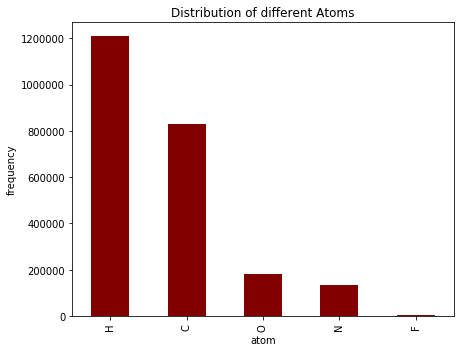

In [45]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of different Atoms')
plt.ylabel('frequency')
plt.xlabel('atom')
structures['atom'].value_counts().plot.bar(color = 'maroon')

plt.tight_layout()
plt.show()

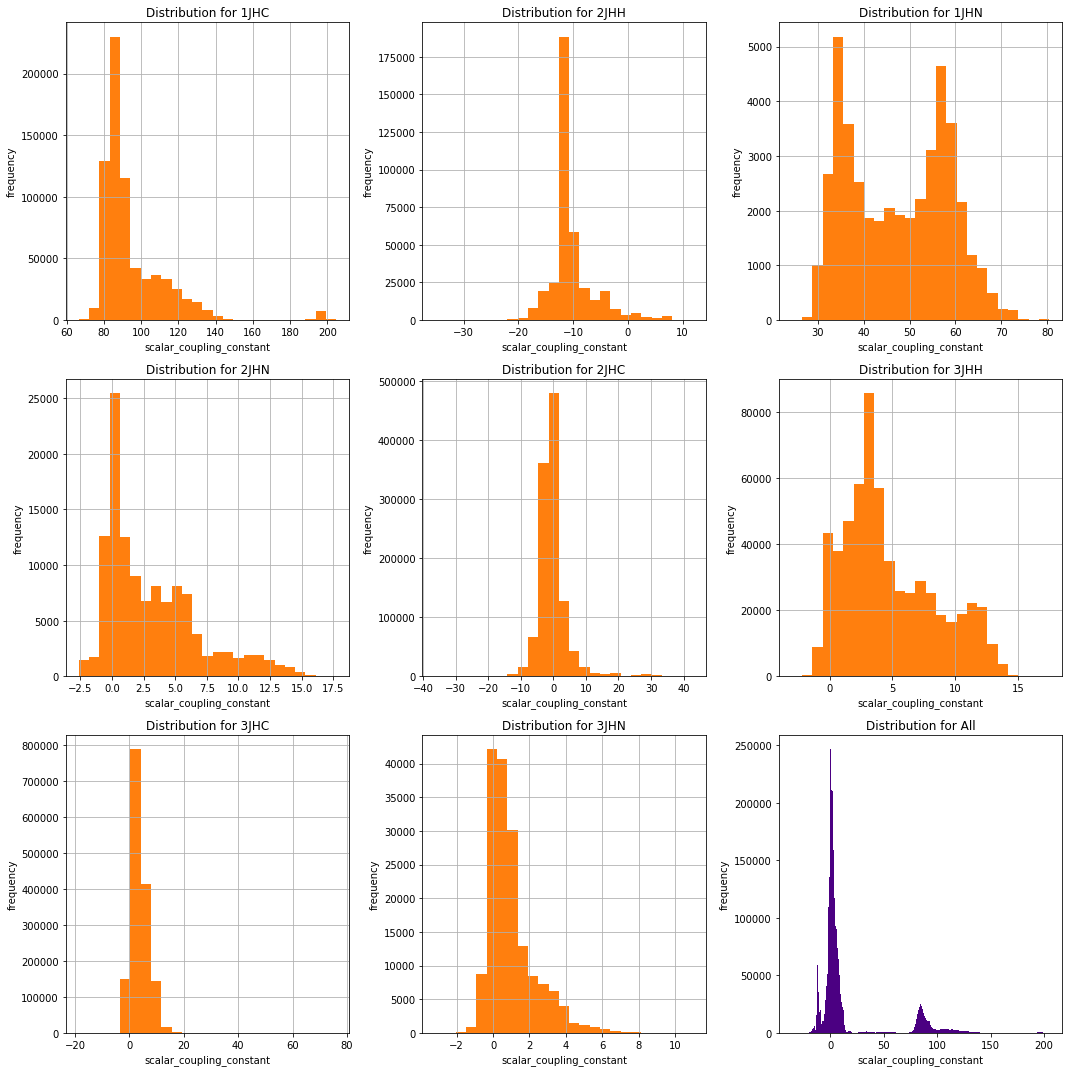

In [46]:
df = train[['type','scalar_coupling_constant']]
plt.figure(figsize=(15,15))

for i,type_ in enumerate(type_list,1):
    plt.subplot(3, 3, i)
    plt.title('Distribution for '+ type_)
    plt.ylabel('frequency')
    plt.xlabel('scalar_coupling_constant')
    plt.hist(df.loc[df['type'] == type_]['scalar_coupling_constant'].values,bins=500)
    df.loc[df['type'] == type_]['scalar_coupling_constant'].hist(bins=25)
plt.subplot(3, 3, 9)
plt.title('Distribution for All')
plt.ylabel('frequency')
plt.xlabel('scalar_coupling_constant')
plt.hist(df['scalar_coupling_constant'].values,bins=500,color='indigo')
plt.tight_layout()
plt.show()

## 3k. Checking the highest and least values of scalar coupling constant

In [17]:
train.sort_values('scalar_coupling_constant', ascending=False).head(2)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
251687,251687,dsgdb9nsd_008961,8,7,1JHC,204.880
9390,9390,dsgdb9nsd_000485,6,0,1JHC,204.426


In [18]:
train.sort_values('scalar_coupling_constant', ascending=True).head(2)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
2359478,2359478,dsgdb9nsd_072293,12,3,2JHC,-36.2186
644225,644225,dsgdb9nsd_020227,8,1,2JHC,-36.0669


we can apply a row selection to get a filtered DataFrame as a result. Let’s now see how we can use the Boolean Series to filter our DataFrame.

In [22]:
check_SCC = train.type == '3JHC'   # subsetting based on 3JHC, 

In [24]:
train[check_SCC].head(2)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
58,58,dsgdb9nsd_000009,3,2,3JHC,4.55166
63,63,dsgdb9nsd_000009,4,2,3JHC,4.55410


1JHC type has the highest vaue of scc, followed by 2J and 3J.It means that when number of bonds is less, which is 1 here and the atoms are very close and interactive force is high. As the distance between the atoms increase with number of bonds the scalar coupling constant values decrease.

In [49]:
df = train.drop(columns = 'id')

In [50]:
df.columns

Index(['molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant'],
      dtype='object')

In [51]:
train.columns

Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant'],
      dtype='object')

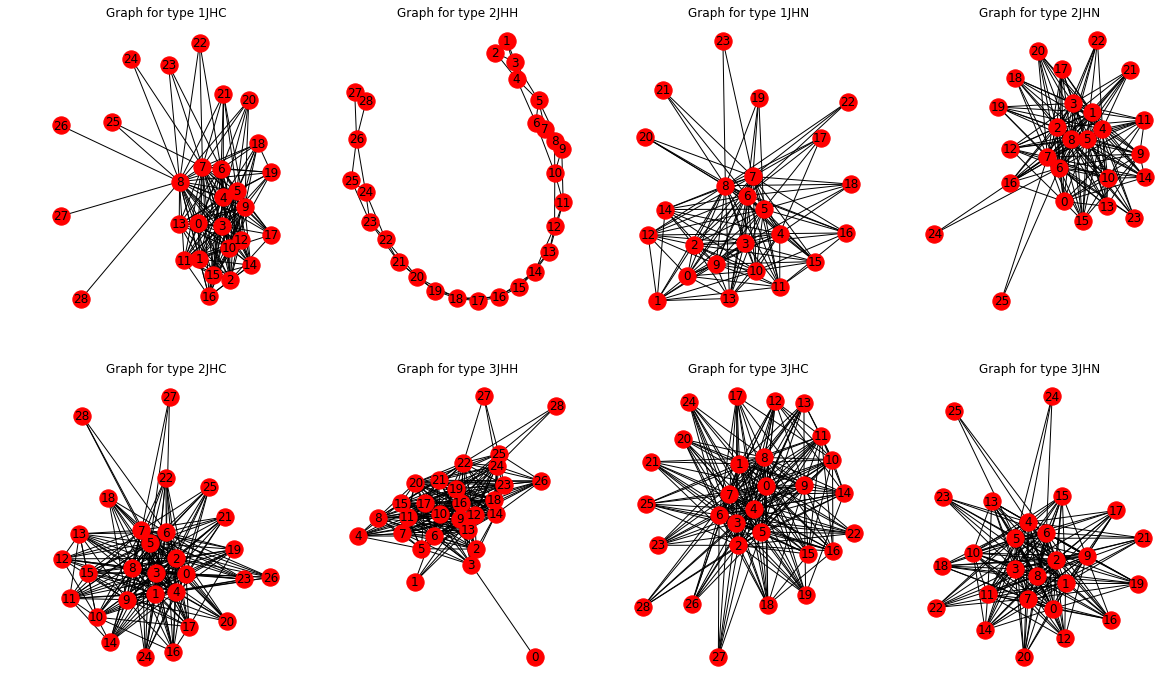

In [25]:
import warnings
warnings.filterwarnings('ignore')
# As the atoms, molecule and scalr coupling constant, we use networkx pyhton package
import networkx as nx
import warnings
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(train['type'].unique()):
    train_type = train.loc[train['type'] == t]
    G = nx.from_pandas_edgelist(train_type, 'atom_index_0', 'atom_index_1', ['scalar_coupling_constant'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')
    #https://www.kaggle.com/artgor/molecular-properties-eda-and-models

We can see that atom connections have different shapes for different types. Type 2JHH has a unique scheme. 
Also we can see that some atoms are connected only to several other atoms.
Better network graphs
But there is a little problem: as we saw earlier, there are atoms which are very rare, as a result graphs will be skewed due to them. We try to improve by dropping atoms for each type which are present in less than 1% of connections

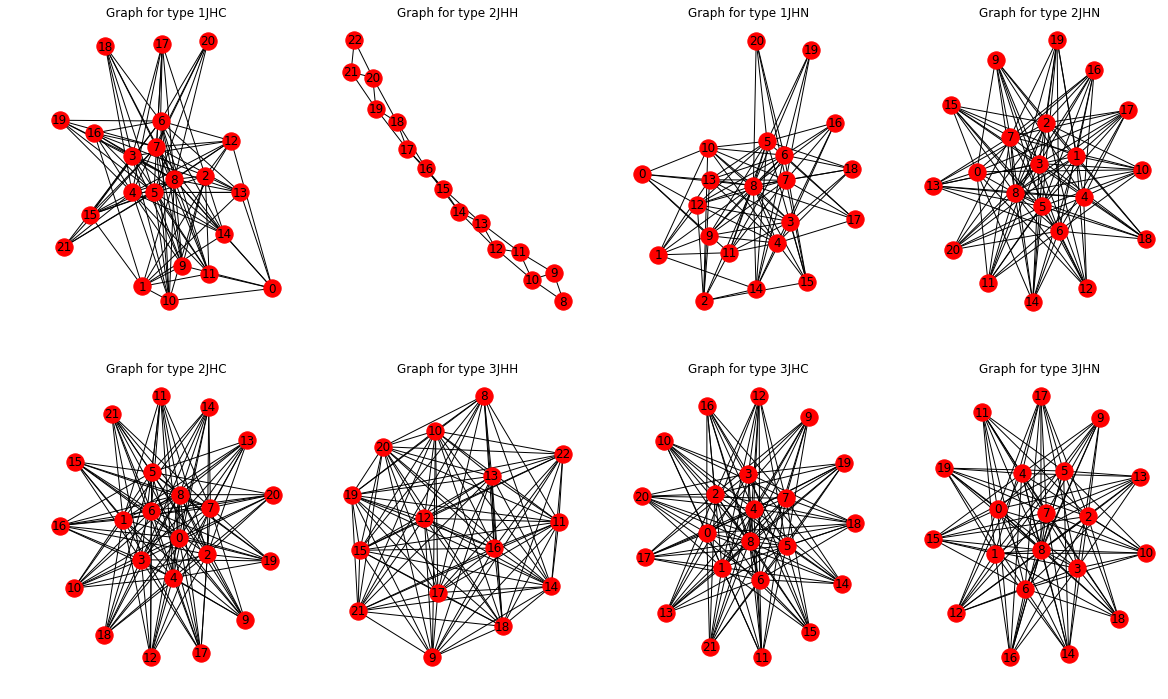

In [26]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(train['type'].unique()):
    train_type = train.loc[train['type'] == t]
    bad_atoms_0 = list(train_type['atom_index_0'].value_counts(normalize=True)[train_type['atom_index_0'].value_counts(normalize=True) < 0.01].index)
    bad_atoms_1 = list(train_type['atom_index_1'].value_counts(normalize=True)[train_type['atom_index_1'].value_counts(normalize=True) < 0.01].index)
    bad_atoms = list(set(bad_atoms_0 + bad_atoms_1))
    train_type = train_type.loc[(train_type['atom_index_0'].isin(bad_atoms_0) == False) & (train_type['atom_index_1'].isin(bad_atoms_1) == False)]
    G = nx.from_pandas_edgelist(train_type, 'atom_index_0', 'atom_index_1', ['scalar_coupling_constant'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

Now the graphs are much more clear!

# 2b. There are 6 more files available with us (without test files) and they are all related to properties of molecules. Lets check them using profiling

In [54]:
structures.head(7) # has molecule name, atom name corrresponding to atom_index and x,y,z cartesian 
                    #coordinates.this is helpul in plotting the structure of molecules

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397
5,dsgdb9nsd_000002,0,N,-0.040426,1.024108,0.062564
6,dsgdb9nsd_000002,1,H,0.017257,0.012545,-0.027377


In [55]:
structures.nunique()

molecule_name     130775
atom_index            29
atom                   5
x                2358441
y                2358364
z                2358421
dtype: int64

In [56]:
sccontributions.head(3) # This again has the common fields like column molecule name , atom_index_0, 
                        #atom_index_1, type along with 4 properties that actually add up to give 
                        #scalar coupling constant

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.27201
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.43360
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.43387


In [57]:
#lets check! for dsgdb9nsd_000001, atom_index_0=1, atom_index_0=0 and type 1JHC
train.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548


In [58]:
print(83.0224+0.254579+1.25862+0.27201) # so we find that there is a direct relation between the 
                                        #train and sccontribution

84.807609


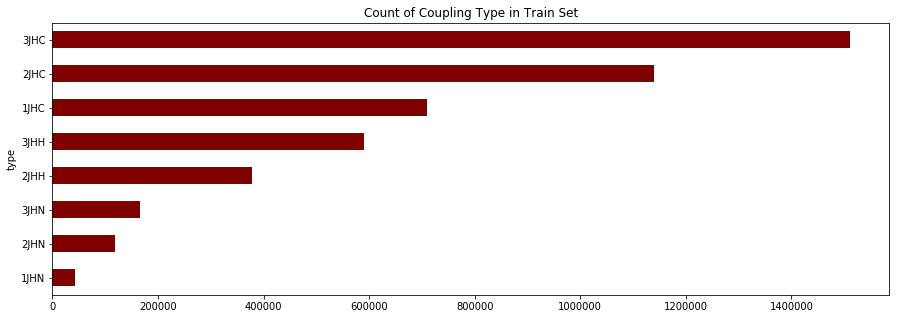

In [59]:
sccontributions.groupby('type').count()['molecule_name'].sort_values().plot(kind='barh',
                                                                color='maroon',
                                                               figsize=(15, 5),
                                                               title='Count of Coupling Type in Train Set')
plt.show()

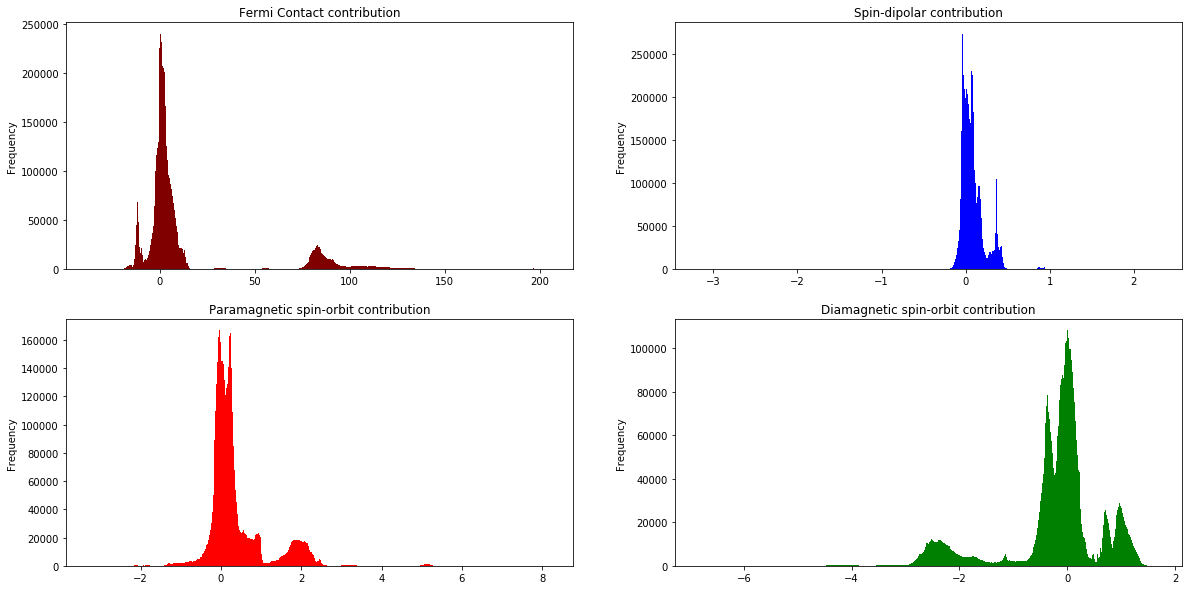

In [60]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sccontributions['fc'].plot(kind='hist', ax=ax.flat[0], bins=500, title='Fermi Contact contribution', color='maroon')
sccontributions['sd'].plot(kind='hist', ax=ax.flat[1], bins=500, title='Spin-dipolar contribution', color='blue')
sccontributions['pso'].plot(kind='hist', ax=ax.flat[2], bins=500, title='Paramagnetic spin-orbit contribution', color='red')
sccontributions['dso'].plot(kind='hist', ax=ax.flat[3], bins=500, title='Diamagnetic spin-orbit contribution', color='green')
plt.show()

In [61]:
dipole_moments.head(3)# has the common molecule name corresponds to the 3-D vectors that indicate the 
                        #charge distribution in a molecule.It can have zero values as x,y,z with zero 
                        #values are non polar molecules. 

,molecule_name,X,Y,Z
0,dsgdb9nsd_000001,0.0000,0.0,0.0000
1,dsgdb9nsd_000002,-0.0002,0.0,1.6256
2,dsgdb9nsd_000003,0.0000,0.0,-1.8511


In [62]:
dipole_moments.shape

(85003, 4)

In [63]:
dipole_moments.nunique() # another interesting thing about dipole momnet is that it has listed all
                        # the unique values of molecule name

molecule_name    85003
X                52494
Y                46825
Z                34847
dtype: int64

In [64]:
magnetic_shielding_tensors.head(3)
# It is a vector, that has the common molecule name, with atom index as can be seen in the 
#structures file with additional details about the elements of the tensor (distance)

,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967


In [65]:
mulliken_charges.head(3)# it has the common columns like molecule name and atom index, 
                        #as structures and magnetic shielding files.

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922


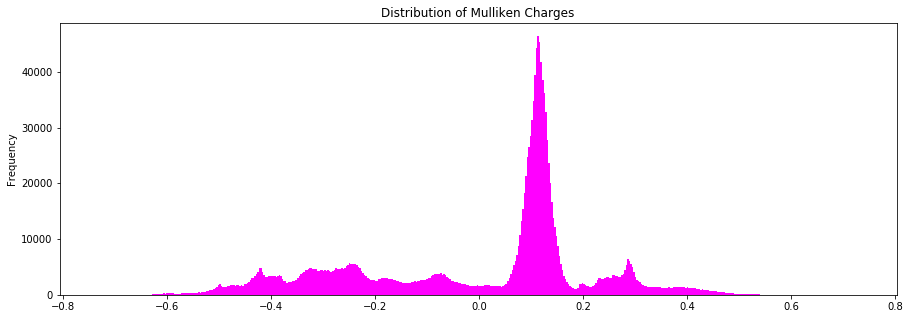

In [66]:
# Plot the distribution of mulliken_charges
mulliken_charges['mulliken_charge'].plot(kind='hist', facecolor='magenta', figsize=(15, 5), bins=500, title='Distribution of Mulliken Charges')
plt.show()

Mulliken charge is really interresting as it provides a quick way of computing atoms local charge with a method based on linear algebra. The most promising method is Electronegativity Equalization Method (EEM) which is describeed in this paper'https://www.kaggle.com/asauve/v7-estimation-of-mulliken-charges-with-open-babel'. Partial atomic charges describe the distribution of electron density in a molecule and therefore provide clues to the chemical behaviour of molecules. Recently, these charges have become popular in chemoinformatics, as they are informative descriptors that can be utilised in pharmacophore design, virtual screening, similarity searches etc. Especially conformationally-dependent charges perform very successfully. In particular, their fast and accurate calculation via the Electronegativity Equalization Method (EEM) seems very promising for chemoinformatics applications.
The charges are calculated with Open Babel, which are available as an autonomous dataset in Open Babel Atom Charges

The Open Babel Package allows to

Read .xyz files (the ones provided in the structures directory)
Build bonding scheme (groovy baby!)
Compute partial charges, with several builtin methods
So we can calculate the mulliken values for train and test datsets using EEM method in babel. Thus this feature can be seen in train as well as head files.

In [67]:
potential_energy.head(3)#energy possesed by the atoms as they are attracted to each other. 
                        #it can be 0, +ve or -ve

,molecule_name,potential_energy
0,dsgdb9nsd_000001,-40.52368
1,dsgdb9nsd_000002,-56.56025
2,dsgdb9nsd_000003,-76.42608


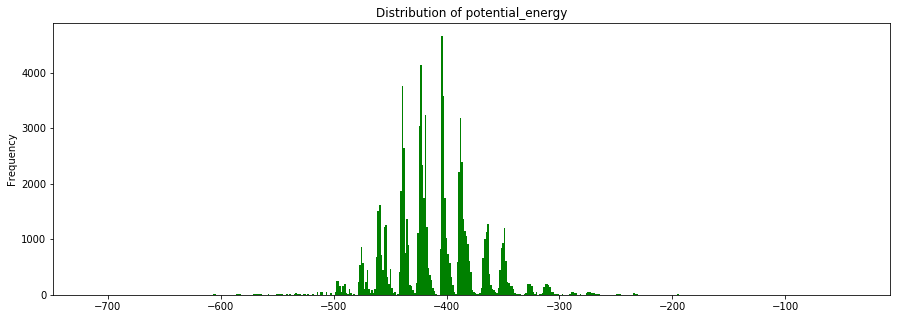

In [68]:
# Plot the distribution of mulliken_charges
potential_energy['potential_energy'].plot(kind='hist', facecolor='green', figsize=(15, 5), bins=500, title='Distribution of potential_energy')
plt.show()

In [69]:
# Atom pair wise info
print('--- Atom pair wise info ---')
print(f'train {train.shape}')
print(f'test {test.shape}')
print(f'scccontributions {sccontributions.shape}')  # only contain train info
print(f'sample_submission {sample_submission.shape}')  # for test prediction

# Molecule wise info
print('--- Molecule wise info ---')
print(f'potential_energy {potential_energy.shape}')  # only contain train info
print(f'dipole_moments {dipole_moments.shape}')  # only contain train info

# Atom wise info
print('--- Atom wise info ---')
print(f'structures {structures.shape}')  # contains both train/test info
print(f'magnetic_shielding_tensors {magnetic_shielding_tensors.shape}')  # only contain train info
print(f'mulliken_charges {mulliken_charges.shape}')  # only contain train info

--- Atom pair wise info ---
train (4658147, 6)
test (2505542, 5)
scccontributions (4658147, 8)
sample_submission (2505542, 2)
--- Molecule wise info ---
potential_energy (85003, 2)
dipole_moments (85003, 4)
--- Atom wise info ---
structures (2358657, 6)
magnetic_shielding_tensors (1533537, 11)
mulliken_charges (1533537, 3)


Relationship between Target and Features
Keep in mind these features are provided for the training data ONLY

In [70]:
sccontributions = sccontributions.merge(train)

In [71]:
sccontributions.head(2)

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso,id,scalar_coupling_constant
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.27201,0,84.8076
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.43360,1,-11.2570


In [72]:
sccontributions.shape

(4658147, 10)

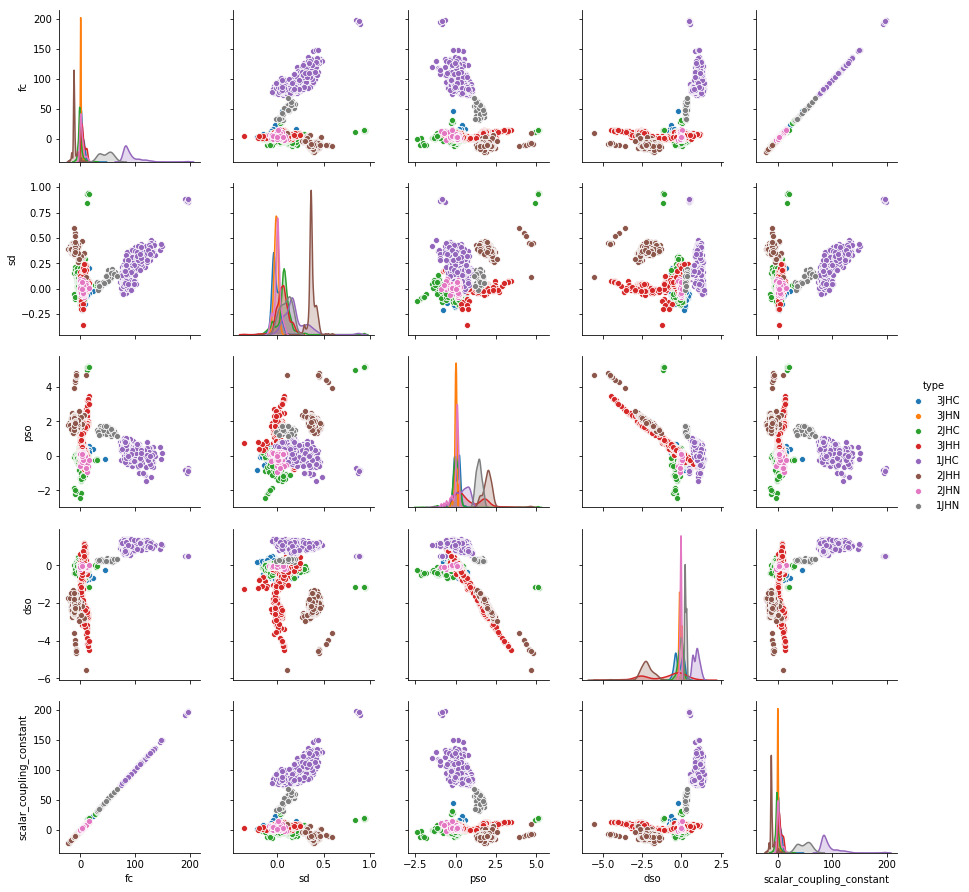

In [73]:
# Downsample to speed up plot time.It shows fc has the best relation with scalar coupling constant
sns.pairplot(data=sccontributions.sample(5000), hue='type', vars=['fc','sd','pso','dso','scalar_coupling_constant'])
plt.show()

# Inference
1. all the information (extra 6 files) provided here can be used to train the model. 
   Note:these files have not been provided with the corresponding test data
2. mulliken charges can be calculated for train as well as test data using babel lib
3. we can draw the structure of the molecules using the structures file and 'ase' lib
4. we can merge the files and study the importance of these features for our outcome that is scalar coupling constant

In [74]:
atom_count_dict = structures.groupby('molecule_name').count()['atom_index'].to_dict()

In [75]:
train['atom_count'] = train['molecule_name'].map(atom_count_dict)
test['atom_count'] = test['molecule_name'].map(atom_count_dict)

In [76]:
train.head(2), test.head(2)

(   id     molecule_name  atom_index_0  atom_index_1  type  \
 0   0  dsgdb9nsd_000001             1             0  1JHC   
 1   1  dsgdb9nsd_000001             1             2  2JHH   
 
    scalar_coupling_constant  atom_count  
 0                   84.8076           5  
 1                  -11.2570           5  ,
         id     molecule_name  atom_index_0  atom_index_1  type  atom_count
 0  4658147  dsgdb9nsd_000004             2             0  2JHC           4
 1  4658148  dsgdb9nsd_000004             2             1  1JHC           4)

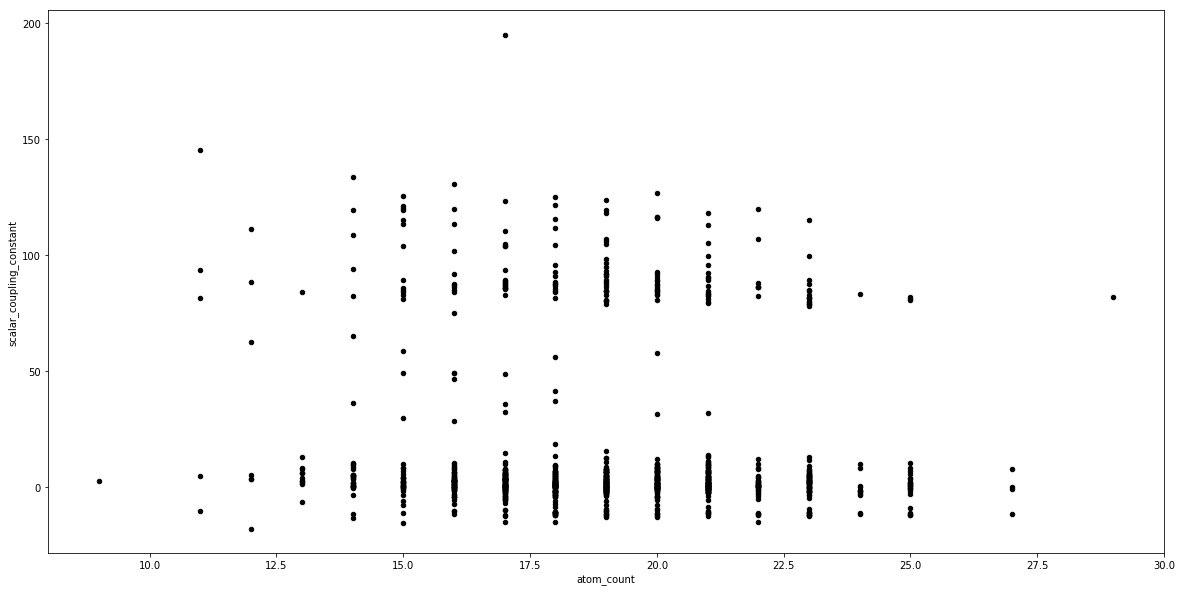

In [77]:
train.sample(1000).plot(x='atom_count',
                           y='scalar_coupling_constant',
                           kind='scatter',
                           color='black',
                           figsize=(20, 10),
                           alpha=1)
plt.show()

When we look at the target scalar_coupling_constant in relation to the atom_count - there visually appears to be a relationship. We notice the gap in coupling constant values, between ~25 and ~75. It is rare to see a value within this range. Could this be a good case for a classification problem between the two clusters?

In [30]:
# lets use structures file to draw the 3d structure 
#https://www.kaggle.com/borisdee/how-to-easy-visualization-of-molecules
import random

# Select a molecule
random_molecule = random.choice(structures['molecule_name'].unique())
molecule = structures[structures['molecule_name'] == random_molecule]
display(molecule)

,molecule_name,atom_index,atom,x,y,z
2314692,dsgdb9nsd_130321,0,N,0.335637,1.305510,0.256965
2314693,dsgdb9nsd_130321,1,C,0.125643,-0.041941,0.081578
2314694,dsgdb9nsd_130321,2,N,-1.039764,-0.620792,0.268945
2314695,dsgdb9nsd_130321,3,O,-0.813018,-1.996029,0.072276
2314696,dsgdb9nsd_130321,4,C,0.469213,-2.193251,-0.246012
2314697,dsgdb9nsd_130321,5,C,1.126749,-1.007169,-0.253879
2314698,dsgdb9nsd_130321,6,O,2.430555,-0.710773,-0.563400
2314699,dsgdb9nsd_130321,7,C,3.400858,-1.144927,0.303074
2314700,dsgdb9nsd_130321,8,O,4.554740,-0.955872,0.095226
2314701,dsgdb9nsd_130321,9,H,1.071350,1.692907,-0.315762


In [31]:
#Next we need to retrieve the atomic coordinates in a numpy array form:
# Get atomic coordinates
atoms = molecule.iloc[:, 3:].values
print(atoms)

[[ 0.33563685  1.30550995  0.25696514]
 [ 0.12564335 -0.04194115  0.08157786]
 [-1.03976356 -0.62079165  0.26894549]
 [-0.81301844 -1.99602915  0.07227644]
 [ 0.46921316 -2.19325086 -0.24601237]
 [ 1.12674906 -1.00716907 -0.25387937]
 [ 2.43055508 -0.71077302 -0.56340048]
 [ 3.40085839 -1.14492738  0.30307446]
 [ 4.55474032 -0.95587176  0.09522567]
 [ 1.07134976  1.69290668 -0.31576157]
 [-0.50773964  1.86147539  0.25040855]
 [ 0.77524398 -3.20836534 -0.44504793]
 [ 2.96710842 -1.67300471  1.1705043 ]]


In [32]:
# Get atomic symbols for all the rows above and 2nd column from above
symbols = molecule.iloc[:, 2].values
print(symbols)

['N' 'C' 'N' 'O' 'C' 'C' 'O' 'C' 'O' 'H' 'H' 'H' 'H']


In [33]:
#Finally, let's put everything into something that ase can process:


In [34]:
import ase
print(ase.__version__)

3.18.0


In [35]:

from ase import Atoms
import ase.visualize

system = Atoms(positions=atoms, symbols=symbols)

ase.visualize.view(system, viewer="x3d")
#here there are 


In [36]:
molecule = structures[0:5] 
display(molecule)

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [37]:
#Next we need to retrieve the atomic coordinates in a numpy array form:
# Get atomic coordinates
atoms = molecule.iloc[0:5, 3:].values
print(atoms)

[[-1.26981359e-02  1.08580416e+00  8.00099580e-03]
 [ 2.15041600e-03 -6.03131760e-03  1.97612040e-03]
 [ 1.01173084e+00  1.46375116e+00  2.76574800e-04]
 [-5.40815069e-01  1.44752661e+00 -8.76643715e-01]
 [-5.23813635e-01  1.43793264e+00  9.06397294e-01]]


In [38]:
# Get atomic symbols for all the rows above and 2nd column from above
symbols = molecule.iloc[:, 2].values
print(symbols)

['C' 'H' 'H' 'H' 'H']


In [39]:
from ase import Atoms
import ase.visualize
system = Atoms(positions=atoms, symbols=symbols)

ase.visualize.view(system, viewer="x3d")